In [4]:
from gguf import GGUFReader
import numpy as np

# 載入 GGUF 模型
model_path= "./models/Llama-3.2-1B-Instruct-Q4_K_M.gguf"

# 讀入你的 GGUF 模型檔案
reader = GGUFReader(model_path)


In [ ]:
   
tensor = next(t for t in reader.tensors if t.name == "blk.0.attn_k.weight")
print("shape:", tensor.shape)
print("tensor_type:", tensor.tensor_type)
print("dtype:", tensor.data)

shape: [2048  512]
dtype: 12
dtype: [[117  14 131 ...   6  55 106]
 [241  12  66 ...  71  86  87]
 [141  10 175 ...  38  55   7]
 ...
 [139   9  24 ... 194 166 132]
 [235   9  87 ... 152 245 169]
 [ 91   8  93 ... 169 236 234]]


In [15]:
names = [t for t in tensor ]
print("Available tensors:", names)

Available tensors: ['blk.0.attn_k.weight', <GGMLQuantizationType.Q4_K: 12>, memmap([2048,  512], dtype=uint64), 1048576, 589824, 255955072, memmap([[117,  14, 131, ...,   6,  55, 106],
        [241,  12,  66, ...,  71,  86,  87],
        [141,  10, 175, ...,  38,  55,   7],
        ...,
        [139,   9,  24, ..., 194, 166, 132],
        [235,   9,  87, ..., 152, 245, 169],
        [ 91,   8,  93, ..., 169, 236, 234]],
       shape=(512, 1152), dtype=uint8), ReaderField(offset=7823245, name='blk.0.attn_k.weight', parts=[memmap([19], dtype=uint64), memmap([ 98, 108, 107,  46,  48,  46,  97, 116, 116, 110,  95, 107,  46,
        119, 101, 105, 103, 104, 116], dtype=uint8), memmap([2], dtype=uint32), memmap([2048,  512], dtype=uint64), memmap([12], dtype=uint32), memmap([248123520], dtype=uint64)], data=[1, 3, 4, 5], types=[])]


In [16]:
all_names = list(reader.tensors.keys())

AttributeError: 'list' object has no attribute 'keys'

In [6]:
data = tensor.data  # numpy array
print("min:", data.min())
print("max:", data.max())
print("mean:", data.mean())
print("std:", data.std())

min: 0
max: 255
mean: 128.72883945041232
std: 62.56197112661377


In [ ]:
print(tensor.data)
print(tensor.tensor_type)

<GGMLQuantizationType.Q4_K: 12>

In [6]:
print("first 10 elements:", data.flatten()[:10])

first 10 elements: [117  14 131  27 170 178 255 231 155 172]


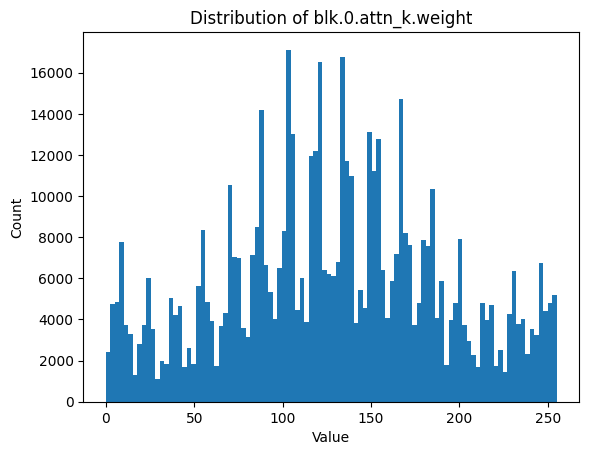

In [8]:
import matplotlib.pyplot as plt

plt.hist(data.flatten(), bins=100)
plt.title("Distribution of blk.0.attn_k.weight")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()


In [1]:
from gguf import GGUFReader
import matplotlib.pyplot as plt

# 載入 GGUF 模型
model_path_fp16= "./models/Llama-3.2-1B-Instruct-f16.gguf"

# 讀入你的 GGUF 模型檔案
reader = GGUFReader(model_path_fp16)
tensor = next(t for t in reader.tensors if t.name == "blk.0.attn_k.weight")
print("shape:", tensor.shape)
print("dtype:", tensor.tensor_type)
print("dtype:", tensor.data)

data = tensor.data 


shape: [2048  512]
dtype: 1
dtype: [[ 0.0581    0.1177    0.06152  ... -0.104    -0.03113   0.02014 ]
 [ 0.08496   0.02515   0.006958 ... -0.01251   0.001183  0.0094  ]
 [-0.01227   0.0742    0.05762  ... -0.02661  -0.02063  -0.04492 ]
 ...
 [-0.02454  -0.010864  0.042    ...  0.03223   0.02002   0.007996]
 [ 0.03418  -0.03857  -0.05054  ... -0.02026   0.04126  -0.00983 ]
 [ 0.0188    0.02393   0.01361  ...  0.003311  0.02466   0.02661 ]]


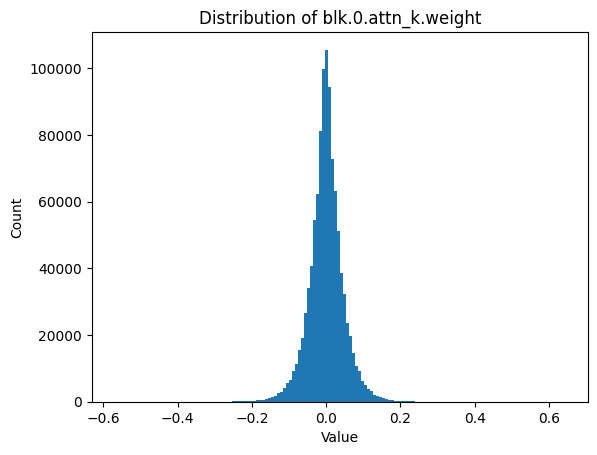

In [2]:

plt.hist(data.flatten(), bins=150)
plt.title("Distribution of blk.0.attn_k.weight")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

In [3]:
print("min:", data.min())
print("max:", data.max())
print("mean:", data.mean())
print("std:", data.std())

min: -0.5703
max: 0.6445
mean: -2.9e-05
std: 0.04672


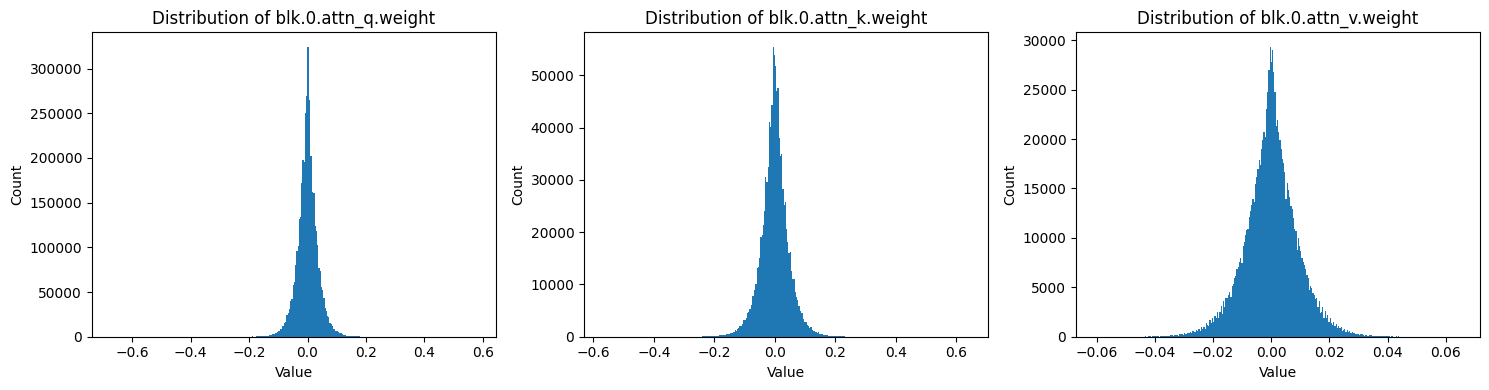

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
q = next(t for t in reader.tensors if t.name == "blk.0.attn_q.weight")
k = next(t for t in reader.tensors if t.name == "blk.0.attn_k.weight")
v = next(t for t in reader.tensors if t.name == "blk.0.attn_v.weight")

for ax, (name, data) in zip(axes, [("Q", q), ("K", k), ("V", v)]):
    ax.hist(data.data.flatten(), bins=300)
    ax.set_title(f"Distribution of blk.0.attn_{name.lower()}.weight")
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [15]:
from scipy import stats
data = q.data.flatten()
params_gennorm = stats.gennorm.fit(data)  
params_laplace = stats.laplace.fit(data)  
params_norm = stats.norm.fit(data)
D_lap, p_lap = stats.kstest(data, 'laplace', args=params_laplace)
D_norm, p_norm = stats.kstest(data, 'norm',    args=params_norm)
D_gen,  p_gen  = stats.kstest(data, 'gennorm', args=params_gennorm)


/wsfs/home/jimmy.fu/miniconda3/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/wsfs/home/jimmy.fu/miniconda3/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:6091: RuntimeWarning: overflow encountered in cast
  fscale = (np.sum(np.abs(data - floc))) / len(data)
/wsfs/home/jimmy.fu/miniconda3/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py:6091: RuntimeWarning: invalid value encountered in scalar divide
  fscale = (np.sum(np.abs(data - floc))) / len(data)


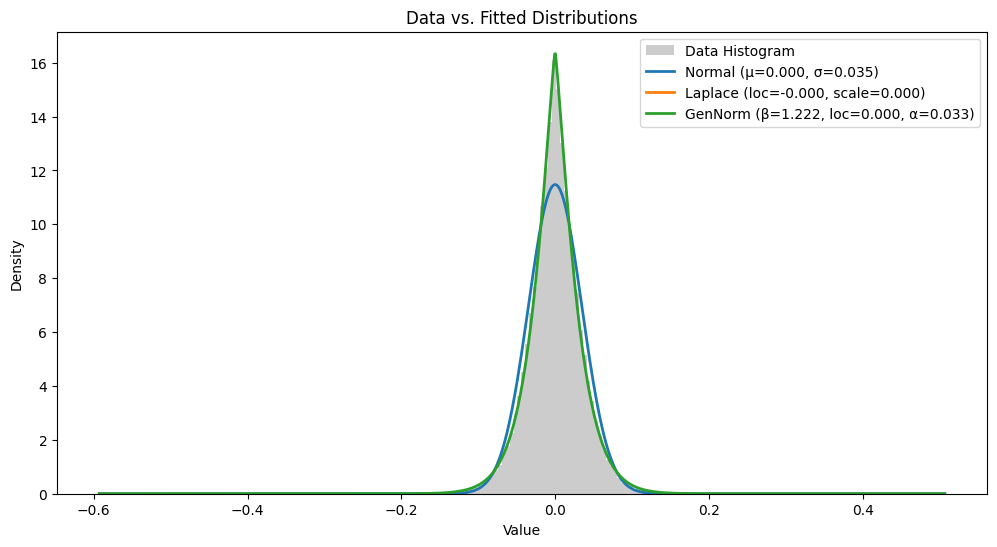

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 假設你已經有 data，以及先前算好的參數：
data = q.data[0:100,:].flatten()
params_norm    = stats.norm.fit(data)
params_laplace = stats.laplace.fit(data)
params_gennorm = stats.gennorm.fit(data)

plt.figure(figsize=(12, 6))  
# 1. 畫歸一化的直方圖
plt.hist(data, bins=200, density=True, alpha=0.4, color='gray', label='Data Histogram')

# 2. 產生 x 座標（擴展一點範圍）
x = np.linspace(data.min()*1.1, data.max()*1.1, 1000)

# 3. 計算各分佈的 PDF
pdf_norm    = stats.norm.pdf   (x, *params_norm)
pdf_laplace = stats.laplace.pdf(x, *params_laplace)
pdf_gennorm = stats.gennorm.pdf(x, *params_gennorm)

# 4. 繪製 PDF 曲線

plt.plot(x, pdf_norm,    lw=2, label=f'Normal (μ={params_norm[0]:.3f}, σ={params_norm[1]:.3f})')
plt.plot(x, pdf_laplace, lw=2, label=f'Laplace (loc={params_laplace[0]:.3f}, scale={params_laplace[1]:.3f})')
plt.plot(x, pdf_gennorm, lw=2, label=f'GenNorm (β={params_gennorm[0]:.3f}, loc={params_gennorm[1]:.3f}, α={params_gennorm[2]:.3f})')

# 5. 美化
plt.title("Data vs. Fitted Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


/tmp/ipykernel_967205/592298931.py:12: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/wsfs/home/jimmy.fu/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


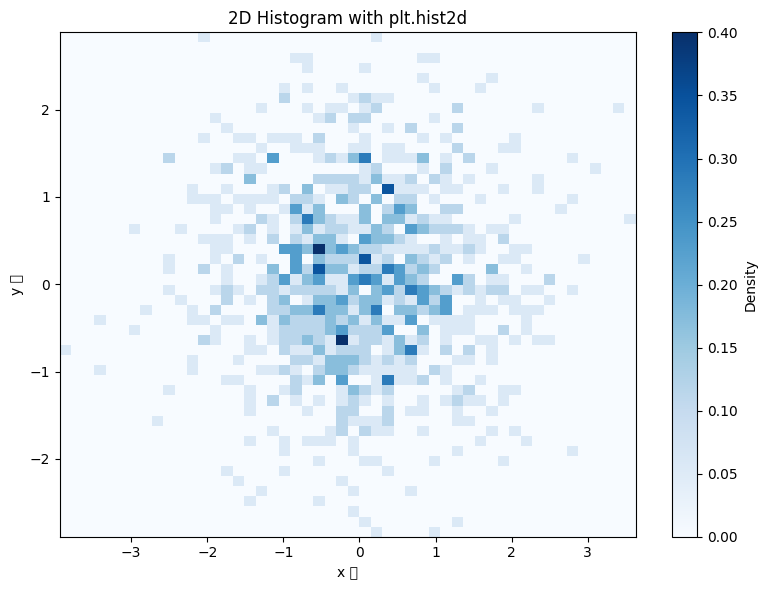

In [ ]:
plt.figure(figsize=(8, 6))
data = q.data
x = np.random.randn(1000)
y = np.random.randn(1000)
hb = plt.hist2d(x, y,
                bins=50,          # x、y 各 50 个箱
                density=True,     # 画出概率密度（可选）
                cmap='Blues')     # 颜色映射
plt.colorbar(hb[3], label='Density')  # hb[3] 是 QuadMesh 对象
plt.xlabel('x 值')
plt.ylabel('y 值')
plt.title('2D Histogram with plt.hist2d')
plt.tight_layout()
plt.show()

In [52]:
k.data

memmap([[ 0.0581  ,  0.1177  ,  0.06152 , ..., -0.104   , -0.03113 ,
          0.02014 ],
        [ 0.08496 ,  0.02515 ,  0.006958, ..., -0.01251 ,  0.001183,
          0.0094  ],
        [-0.01227 ,  0.0742  ,  0.05762 , ..., -0.02661 , -0.02063 ,
         -0.04492 ],
        ...,
        [-0.02454 , -0.010864,  0.042   , ...,  0.03223 ,  0.02002 ,
          0.007996],
        [ 0.03418 , -0.03857 , -0.05054 , ..., -0.02026 ,  0.04126 ,
         -0.00983 ],
        [ 0.0188  ,  0.02393 ,  0.01361 , ...,  0.003311,  0.02466 ,
          0.02661 ]], shape=(512, 2048), dtype=float16)

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def plot_weight(tensor):
    weights = tensor.data
    nbins = 100
    # 2. 根据所有数据范围，生成 bin edges
    vmin, vmax = weights.min(), weights.max()
    bins = np.linspace(vmin, vmax, nbins + 1)

    # 3. 对每一行分别做 histogram，结果存到 hist2d
    hist2d = np.zeros((weights.shape[0], nbins), dtype=int)
    for i in range(weights.shape[0]):
        hist, _ = np.histogram(weights[i], bins=bins)
        hist2d[i, :] = hist

    # 4. 画 2D 热力图
    plt.figure(figsize=(6, 6))
    plt.imshow(hist2d, aspect='auto', origin='lower', extent=[vmin, vmax, 0, weights.shape[0]])  
    plt.colorbar(label='Count')
    plt.xlabel('Weight value')
    plt.ylabel('Row index (0–511)')
    plt.title('2D Histogram of LLM Weights')
    plt.xlim(-0.05, 0.05)
    plt.show()




block 0 的 attn_k.weight: [2048  512]


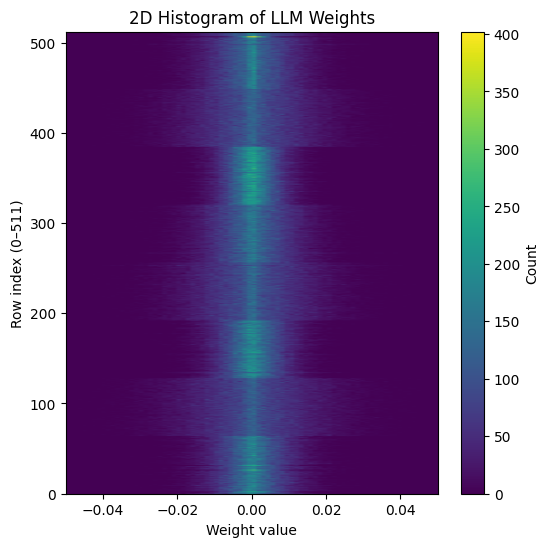

block 1 的 attn_k.weight: [2048  512]


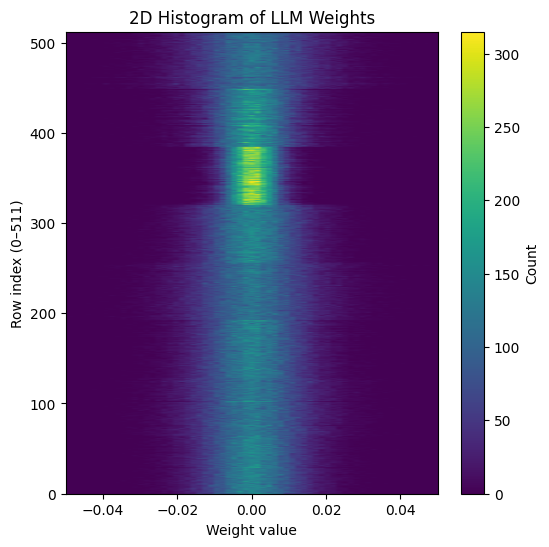

block 2 的 attn_k.weight: [2048  512]


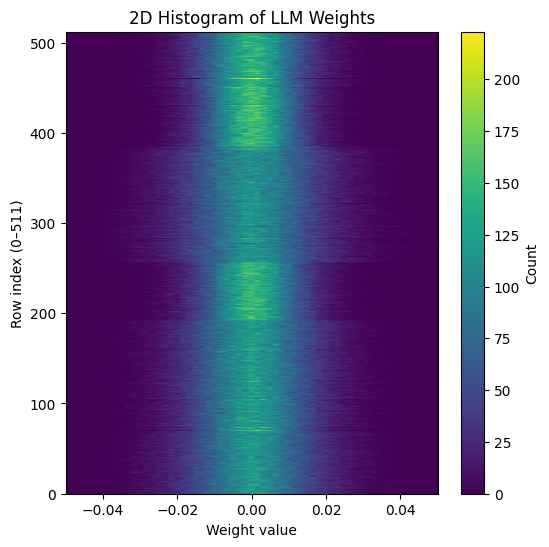

block 3 的 attn_k.weight: [2048  512]


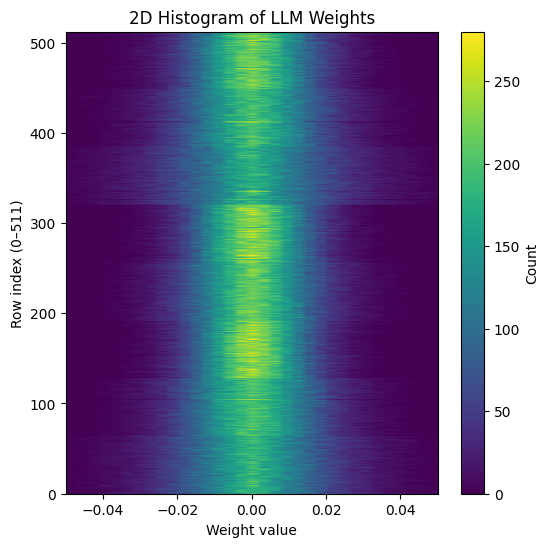

block 4 的 attn_k.weight: [2048  512]


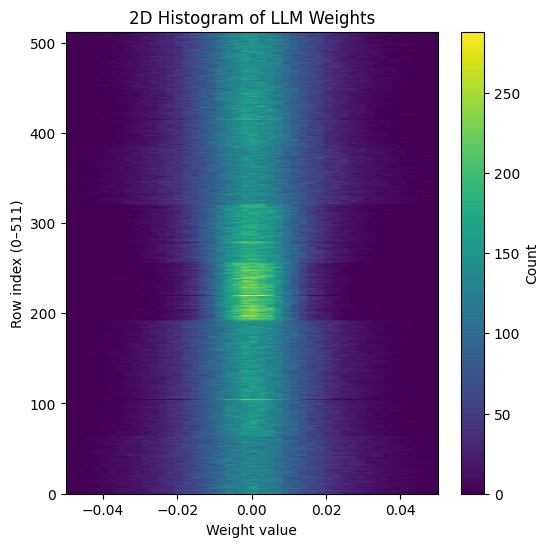

block 5 的 attn_k.weight: [2048  512]


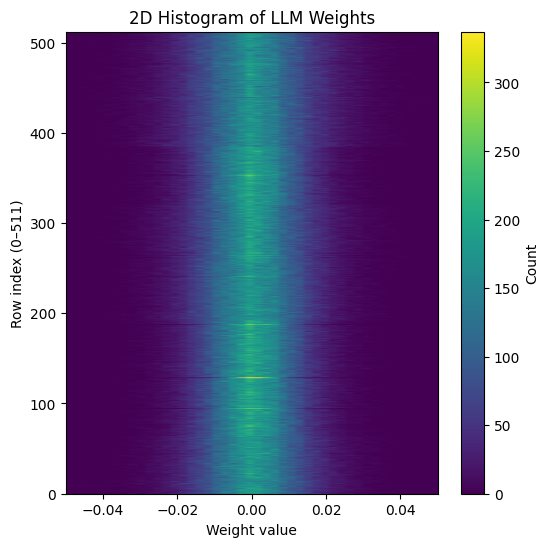

block 6 的 attn_k.weight: [2048  512]


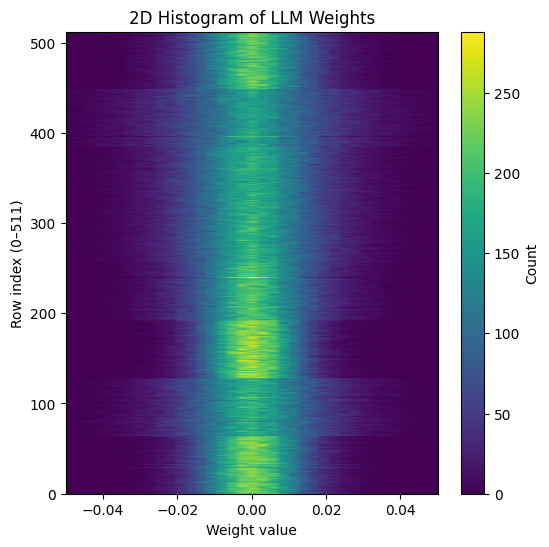

block 7 的 attn_k.weight: [2048  512]


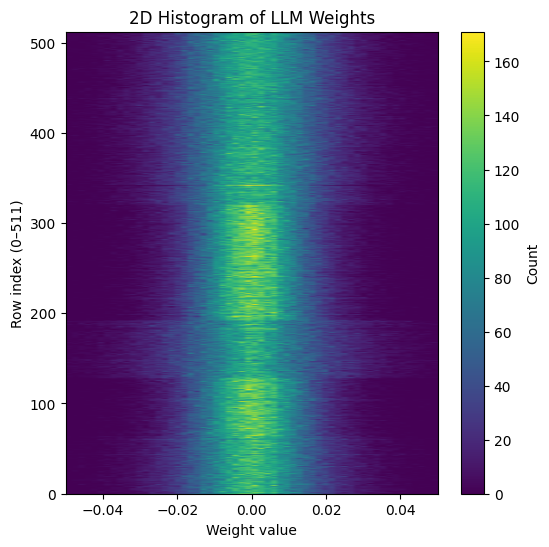

block 8 的 attn_k.weight: [2048  512]


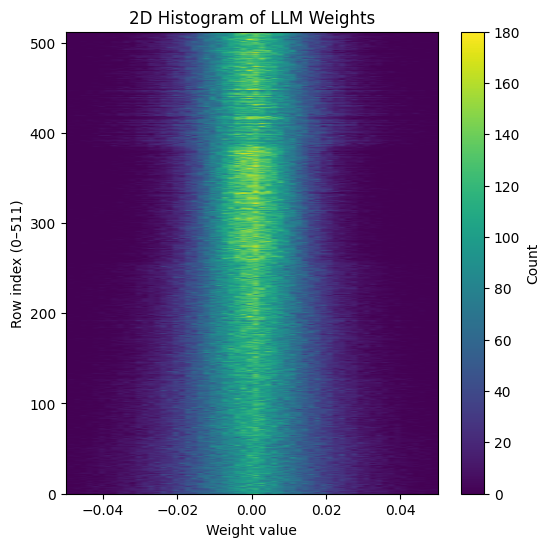

block 9 的 attn_k.weight: [2048  512]


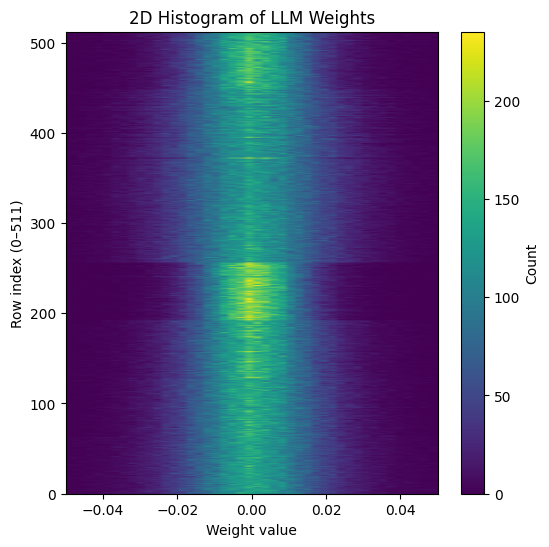

block 10 的 attn_k.weight: [2048  512]


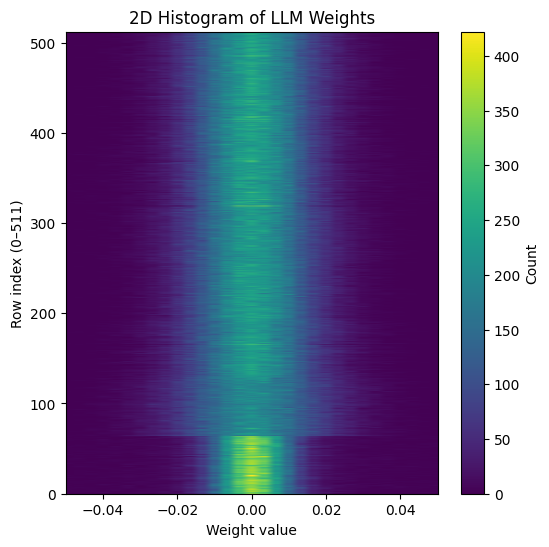

block 11 的 attn_k.weight: [2048  512]


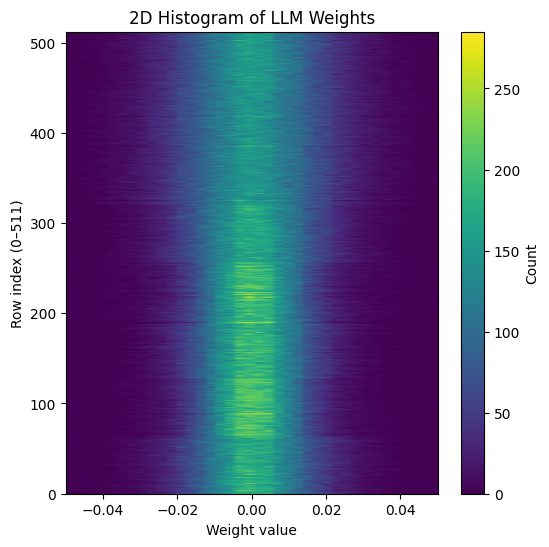

block 12 的 attn_k.weight: [2048  512]


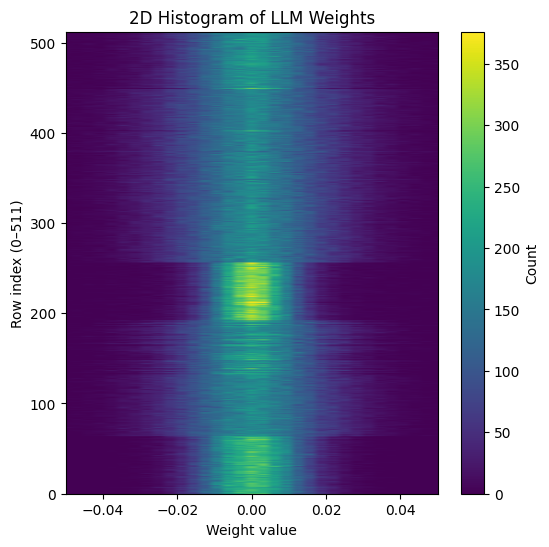

block 13 的 attn_k.weight: [2048  512]


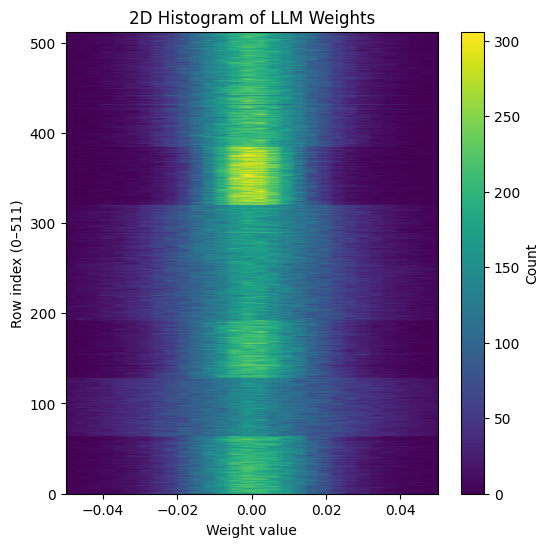

block 14 的 attn_k.weight: [2048  512]


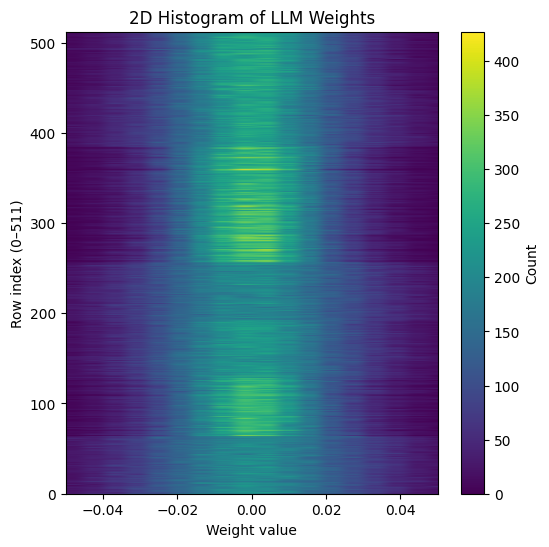

block 15 的 attn_k.weight: [2048  512]


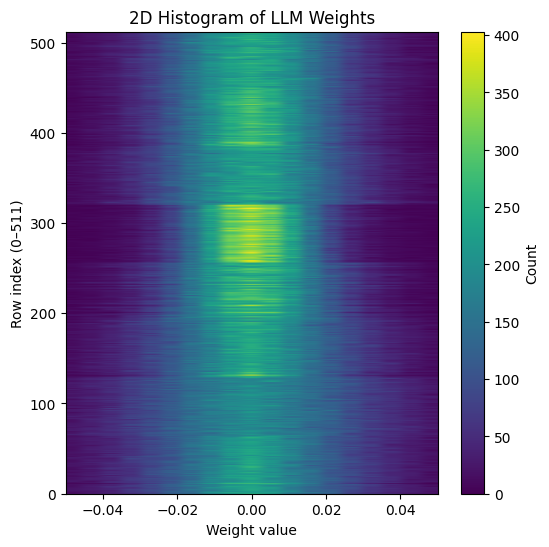

In [92]:
N = 16
M = "v"
for i in range(N):
    name = f"blk.{i}.attn_{M}.weight"
    tensor = next(t for t in reader.tensors if t.name == name)
    print(f"block {i} 的 attn_k.weight:", tensor.shape)
    plot_weight(tensor)
    #input("按 Enter 檢視下一個 block...")

blk.0.attn_output.weight: [2048 2048]


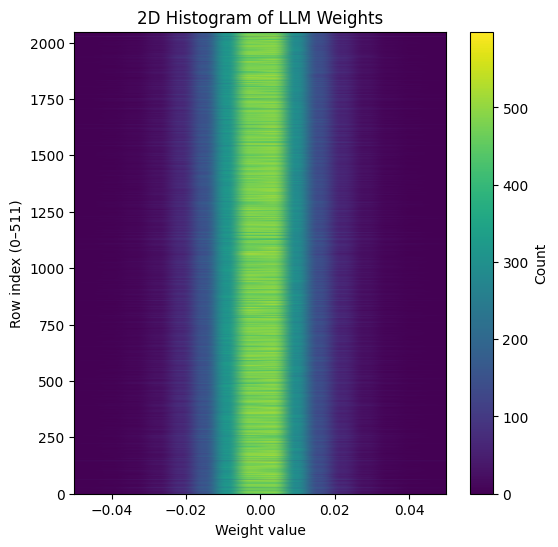

blk.1.attn_output.weight: [2048 2048]


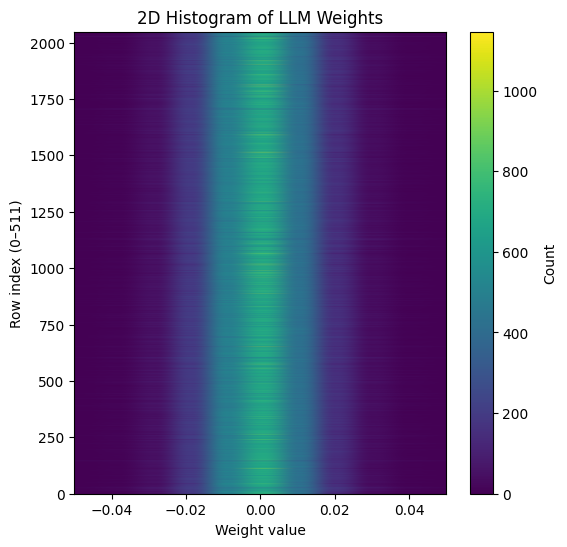

blk.2.attn_output.weight: [2048 2048]


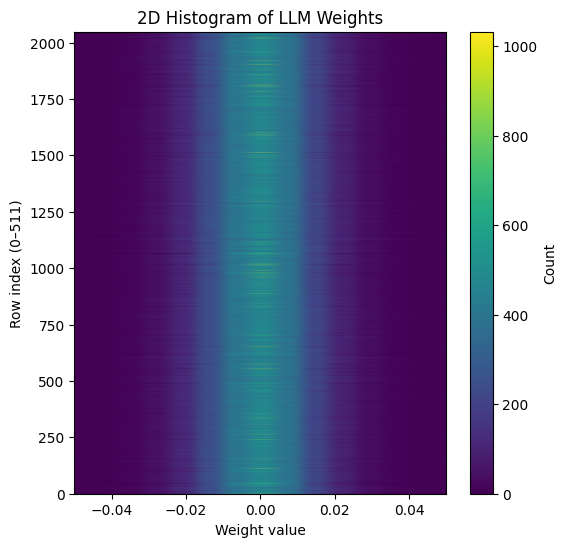

blk.3.attn_output.weight: [2048 2048]


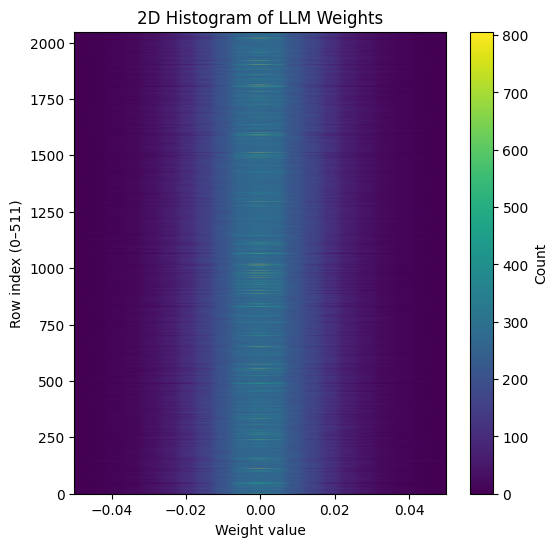

blk.4.attn_output.weight: [2048 2048]


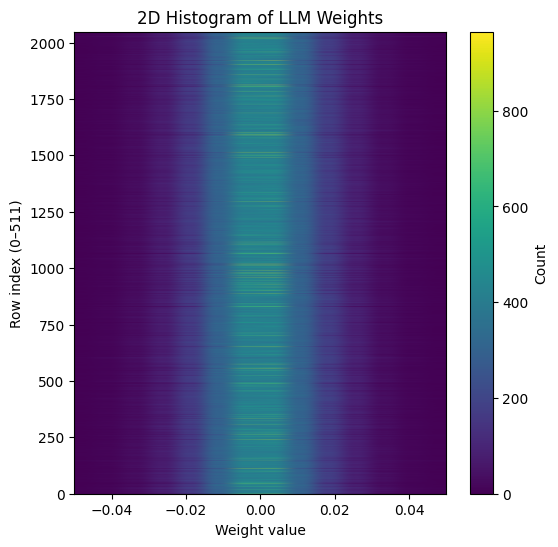

blk.5.attn_output.weight: [2048 2048]


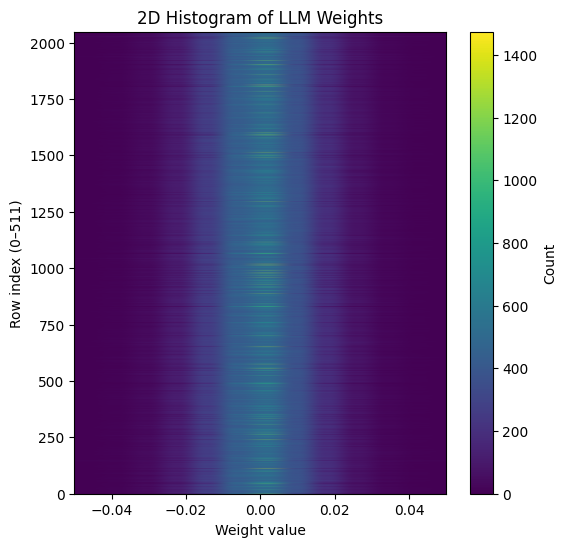

blk.6.attn_output.weight: [2048 2048]


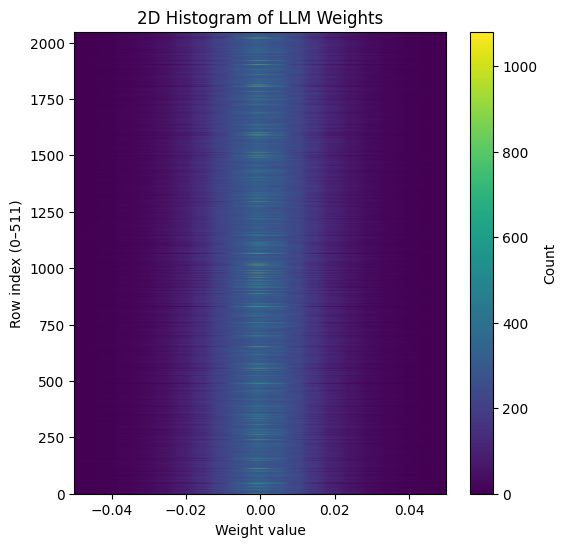

blk.7.attn_output.weight: [2048 2048]


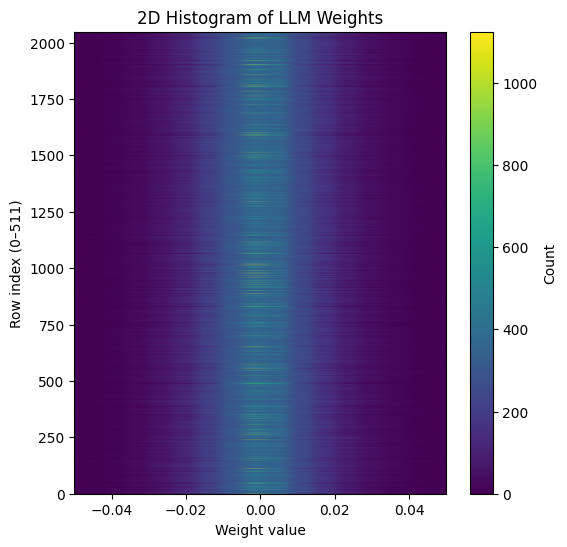

blk.8.attn_output.weight: [2048 2048]


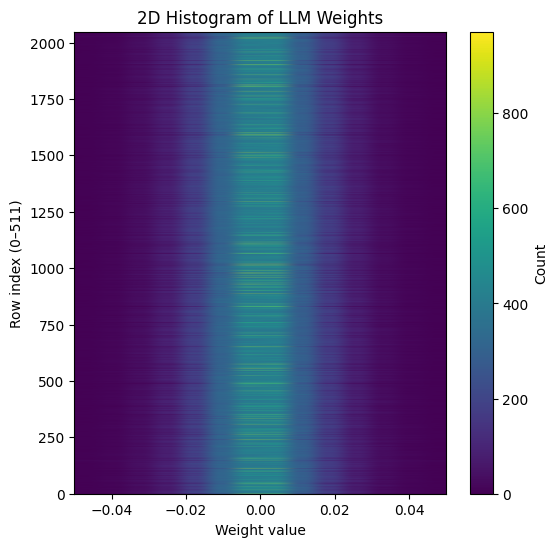

blk.9.attn_output.weight: [2048 2048]


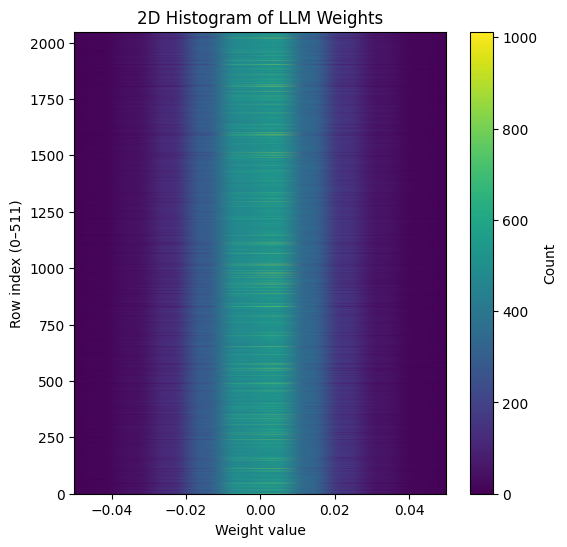

blk.10.attn_output.weight: [2048 2048]


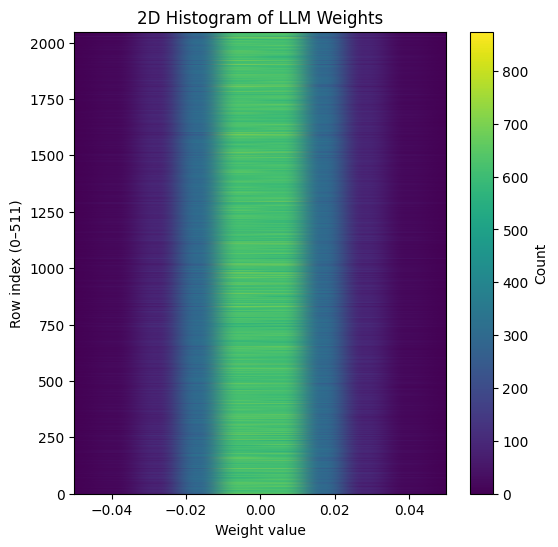

blk.11.attn_output.weight: [2048 2048]


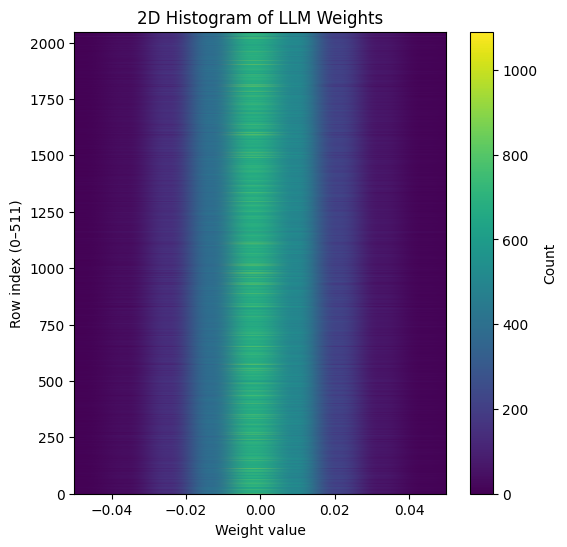

blk.12.attn_output.weight: [2048 2048]


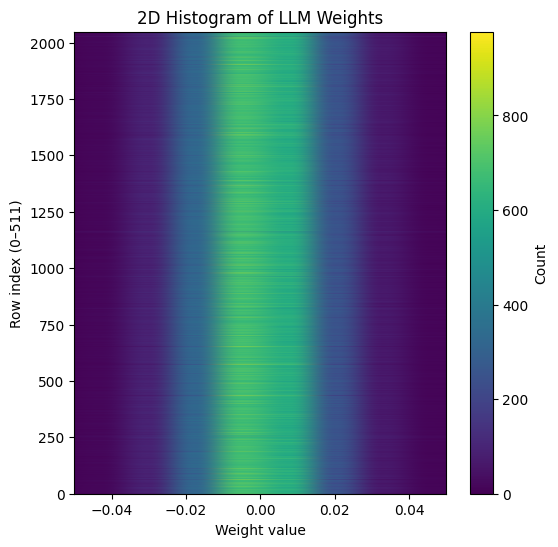

blk.13.attn_output.weight: [2048 2048]


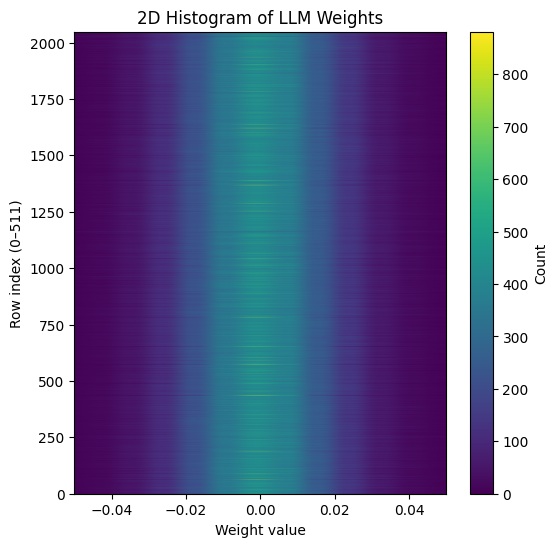

blk.14.attn_output.weight: [2048 2048]


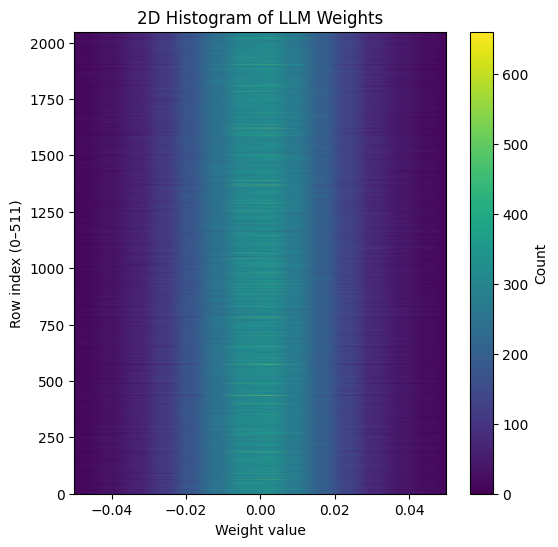

blk.15.attn_output.weight: [2048 2048]


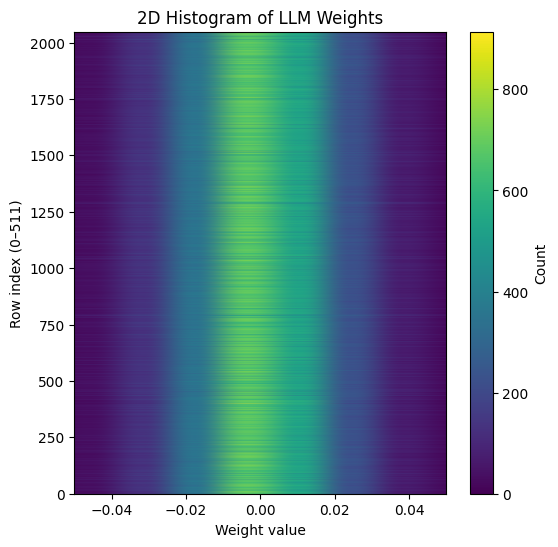

In [ ]:
N = 16

for i in range(N):
    name = f"blk.{i}.attn_output.weight"
    tensor = next(t for t in reader.tensors if t.name == name)
    print(f"{name}:", tensor.shape)
    plot_weight(tensor)
    #input("按 Enter 檢視下一個 block...")

In [ ]:
suffixes = [
    "attn_norm.weight",
    "ffn_down.weight",
    "ffn_gate.weight",
    "ffn_up.weight",
    "ffn_norm.weight",
    "attn_k.weight",
    "attn_output.weight",
    "attn_q.weight",
    "attn_v.weight",
]

f_strings = [f"blk.{i}.{s}" for s in suffixes]

In [100]:
N = 16

for s in suffixes:
    for i in range(N):
        f_strings = f"blk.{i}.{s}"
        tensor = next(t for t in reader.tensors if t.name == f_strings)
        data = tensor.data  # numpy array
        min_ = data.min()
        max_ = data.max()
        mean_ = data.mean()
        std_ = data.std()
        print(f_strings,min_, max_, mean_, std_)

blk.0.attn_norm.weight -0.640625 1.0625 0.14212072 0.16138527
blk.1.attn_norm.weight -0.16015625 0.875 0.33173466 0.08819345
blk.2.attn_norm.weight -0.30859375 1.015625 0.4258599 0.09644608
blk.3.attn_norm.weight 0.10058594 0.9609375 0.39690495 0.05103802
blk.4.attn_norm.weight 0.115234375 0.890625 0.40469122 0.05397616
blk.5.attn_norm.weight 0.115234375 1.1015625 0.45826817 0.07889631
blk.6.attn_norm.weight 0.14550781 0.90625 0.45265198 0.061443333
blk.7.attn_norm.weight 0.13769531 0.984375 0.46101665 0.07307959
blk.8.attn_norm.weight 0.140625 1.0703125 0.4885707 0.0704896
blk.9.attn_norm.weight 0.12695312 1.0078125 0.4683628 0.059683174
blk.10.attn_norm.weight 0.10888672 1.09375 0.5329294 0.07027603
blk.11.attn_norm.weight 0.1015625 0.98828125 0.5086131 0.05776105
blk.12.attn_norm.weight 0.084472656 0.98046875 0.4856372 0.060186308
blk.13.attn_norm.weight -0.08886719 1.1640625 0.52032065 0.0847378
blk.14.attn_norm.weight 0.07421875 1.2265625 0.4583528 0.11804472
blk.15.attn_norm.weig

In [ ]:
from gguf import GGUFReader
#import matplotlib.pyplot as plt

# 載入 GGUF 模型
#model_path= "./models/Llama-3.2-1B-Instruct-f16.gguf"
model_path= "./models/Llama-3.2-1B-Instruct-Q4_K_M.gguf"

# 讀入你的 GGUF 模型檔案
reader = GGUFReader(model_path)

suffixes_weight = [
    "ffn_down.weight",
    "ffn_gate.weight",
    "ffn_up.weight",
    "attn_k.weight",
    "attn_output.weight",
    "attn_q.weight",
    "attn_v.weight",
]

import numpy as np
from PIL import Image

def save_matrix_as_grayscale_png(matrix: np.ndarray, filename: str):
    mat_min, mat_max = matrix.min(), matrix.max()
    norm = (matrix - mat_min) / (mat_max - mat_min) * 255
    img = Image.fromarray(norm.astype(np.uint8), mode='L')
    img.save(filename)

N = 16
for s in suffixes_weight:
    for i in range(N):
        f_strings = f"blk.{i}.{s}"
        tensor = next(t for t in reader.tensors if t.name == f_strings)
        data = tensor.data  # numpy array
        if tensor.tensor_type == 12:
            save_matrix_as_grayscale_png(data, "./data_image_llama3_1B_Q4_K_M/"+f_strings+".png")


In [ ]:
def reshape_4b_array(arr):
    H, W = arr.shape
    # 拆高、低 4 bit
    high = (arr >> 4).astype(np.uint8)
    low  = (arr & 0x0F).astype(np.uint8)

    # 新矩陣，shape=(H, W*2)
    new_arr = np.empty((H, W*2), dtype=np.uint8)

    # 偶數欄放 high，奇數欄放 low
    new_arr[:, 0::2] = high
    new_arr[:, 1::2] = low
    return new_arr    

def drop_per_block_numpy(mat, block_size=144, drop=16):
    arr = np.asarray(mat)
    keep_cols = [j for j in range(arr.shape[1]) if (j % block_size) >= drop]
    return reshape_4b_array(arr[:, keep_cols])

N = 16
data_d = { s: [None]*N for s in suffixes_weight }

for s in suffixes_weight:
    for i in range(N):
        f_strings = f"blk.{i}.{s}"
        tensor = next(t for t in reader.tensors if t.name == f_strings)
        data = tensor.data  # numpy array
        if tensor.tensor_type == 12:
            #data_d = drop_per_block_numpy(data)
            data_d[s][i] = drop_per_block_numpy(tensor.data)
            #save_matrix_as_grayscale_png(data_d, "./data_image_llama3_1B_Q4_K_M/"+f_strings+".png")

In [12]:
import numpy as np

def concat_non_none_blocks(block_list):
    """
    將 list 裡所有非 None 的 numpy 陣列，沿第 0 軸拼接。
    回傳 shape 為 (2048 * n, 8192) 的新陣列；如果沒有任何區塊，回傳 shape=(0, 0) 的空陣列。
    """
    # 篩選出非 None 的區塊
    blocks = [b for b in block_list if b is not None]
    if not blocks:
        # 沒有資料時回傳空陣列
        return np.empty((0, 0), dtype=np.uint8)
    # 確認所有區塊的寬度相同
    widths = {b.shape[1] for b in blocks}
    if len(widths) != 1:
        raise ValueError(f"要拼接的區塊寬度不一致: {widths}")
    # 沿第 0 軸拼接
    return np.concatenate(blocks, axis=0)

# 範例用法blocks = data_d["ffn_up.weight"]      # 你的 list
big_matrix = concat_non_none_blocks(data_d)
print("拼接後的大矩陣形狀:", big_matrix.shape)


IndexError: tuple index out of range